## Capstone Project: Providing Data-Driven Suggestions for HR

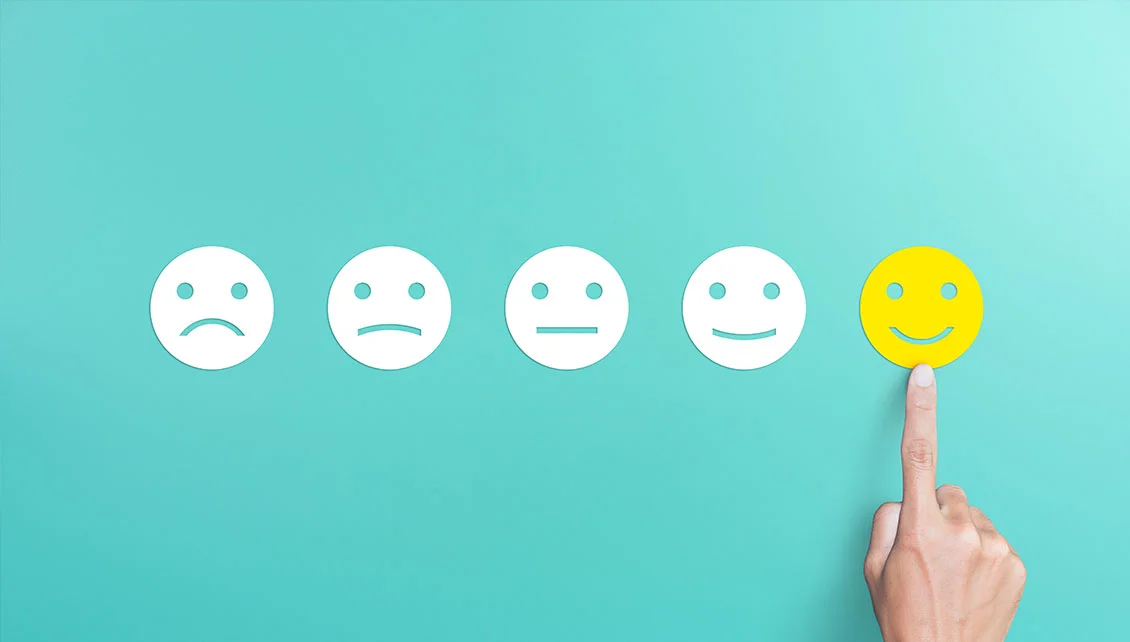

### Table of Contents
1. [Problem Statement](#1.-Problem-Statement)
2. [Import Libraries](#2.-Import-Libraries)
3. [Examining Dataset](#3.-Examining-Dataset)
4. [Descriptive Statistics](#4.-Descriptive-Statistics)
5. [Data Cleaning](#5.-Data-Cleaning)
6. [Outlier Detection](#6.-Outlier-Detection)
7. [Data Visualization and Analysis](#7.-Data-Visualization-and-Analysis)
8. [Correlation Heatmap](#8.-Correlation-Heatmap)
9. [Label Encoding](#9.-Label-Encoding)
10. [Random Forest Model Building](#9.-Random-Forest-Model-Building)
11. [Random Forest Feature Importances](#11.-Random-Forest-Feature-Importances)
12. [Conclusion and Recommendations](#12.-Conclusion-and-Recommendations)

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction
levels at the company. They collected data from employees, but now they don’t know what
to do with it. They refer to you as a data analytics professional and ask you to provide data-driven
suggestions based on your understanding of the data. They have the following question: what’s
likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a
model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute
to their leaving. Because it is time-consuming and expensive to find, interview, and hire new
employees, increasing employee retention will be beneficial to the company.

## 2. Import Libraries

In [3]:
# Import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# For displaying all of the columns and rows in dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Seaborn palette setting
sns.set_palette(palette= 'Set1')
sns.set_style("whitegrid")

In [5]:
# Load the dataset
hr_data = pd.read_csv(r'C:\Users\Mohammed Nafrees\Datasets\HR_capstone.csv')

## 3. Examining Dataset

In [6]:
# Display first 4 rows of the dataframe
hr_data.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [7]:
# Display last 4 rows of the dataframe
hr_data.tail(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [8]:
# Shape of data
hr_data.shape

(14999, 10)

In [9]:
# Column names of the data
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
# Basic information about the data
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
hr_data['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

## 4. Descriptive Statistics

In [12]:
# Descriptive statistics about the data
hr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


## 5. Data Cleaning

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


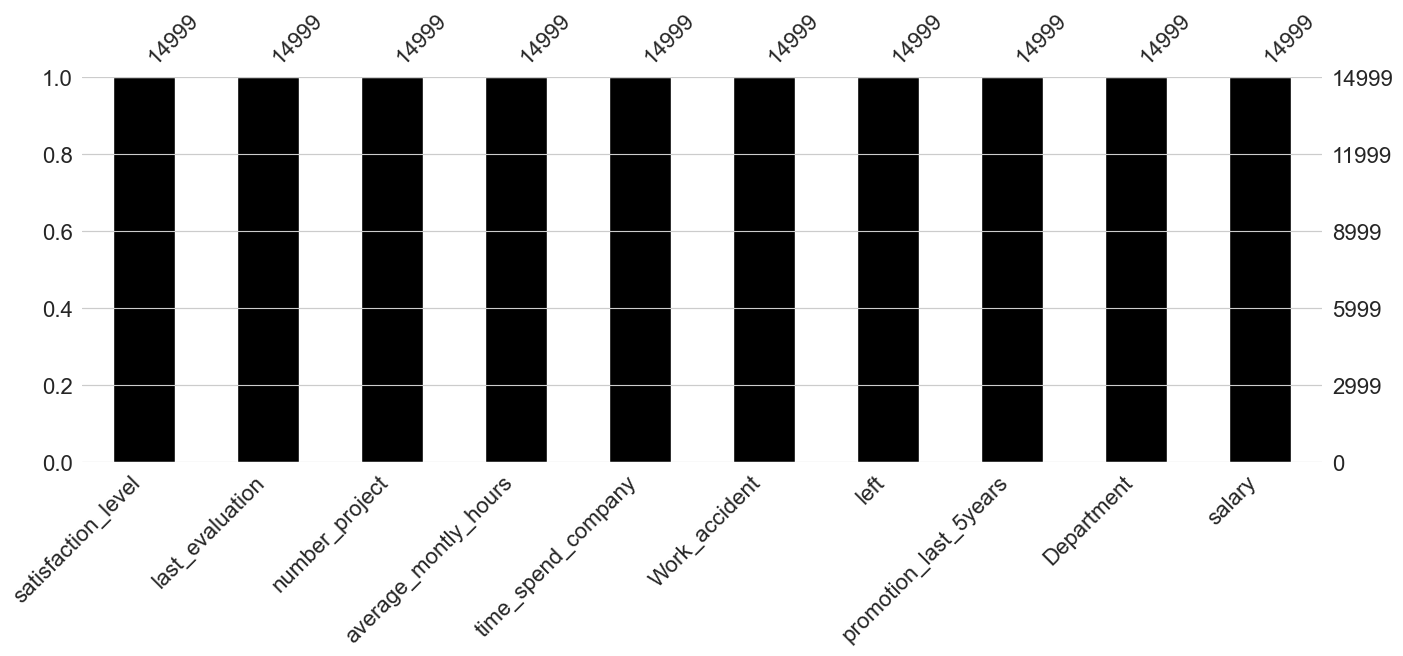

In [13]:
# Check for missing values
print(hr_data.isna().sum())

# Visualize missing values
msno.bar(hr_data, figsize = (16,5),color = "black")
plt.show()

There are no missing values in the dataset

In [14]:
# Check for duplicate entries in the data
hr_data.duplicated().sum()

3008

There are 3008 duplicate rows in the dataset

In [15]:
# Drop duplicates
hr_data.drop_duplicates(inplace=True)

In [16]:
# Shape of the data after dropping duplicates
hr_data.shape

(11991, 10)

In [17]:
# Convert all column name letters to lowercases
hr_data.rename(columns= lambda x: x.lower(), inplace=True)

# Rename columns
hr_data = hr_data.rename(columns= {'average_montly_hours': 'average_monthly_hours',
                                   'time_spend_company': 'tenure',
                                   'left': 'left/stayed'})
                                   
# Display all column names after the update
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left/stayed',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [18]:
# Replace numerical data with categorical data in the 'left/stayed' column
hr_data['left/stayed']=hr_data['left/stayed'].replace({0: 'Stayed', 1: 'Left'})

## 6. Outlier Detection

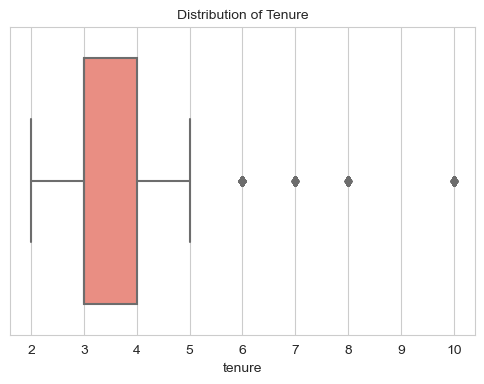

In [19]:
# Boxplot to visualize distribution of tenure and detect any outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=hr_data['tenure'], color='#FA8072')
plt.title('Distribution of Tenure', fontsize=10)
plt.show()

The boxplot above shows that there are outliers in the tenure variable.

In [20]:
# Number of rows containing outliers in tenure variable

# 25th percentile value in tenure
percentile_25 = hr_data['tenure'].quantile(0.25)

# 75th percentile value in tenure
percentile_75 = hr_data['tenure'].quantile(0.75)

# Interquartile range
iqr = percentile_75 - percentile_25

# Upper limit and lower limit for non-outlier values in tenure
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)

# Subset of data contain outliers in tenure
outliers = hr_data.query('tenure > @upper_limit | tenure < @lower_limit')

# Number of rows that contain outliers
print('Number of rows in the data containing outliers in tenure:', len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in tenure: 824


## 7. Data Visualization and Analysis

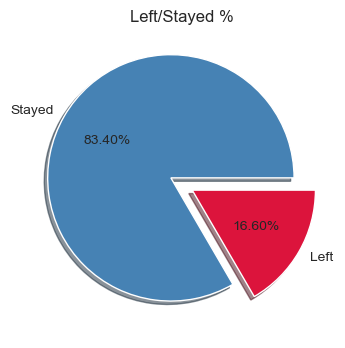

In [21]:
# 'left/stayed' percentage in pie chart
plt.figure(figsize=(4,4))
left_rate = hr_data['left/stayed'].value_counts()
plt.pie(left_rate, labels=left_rate.index, colors=['steelblue', 'crimson'], autopct='%1.2f%%', 
        explode=[0.1, 0.1], shadow=True)
plt.title('Left/Stayed %')
plt.show()

16.60% of the employees departed the organization.

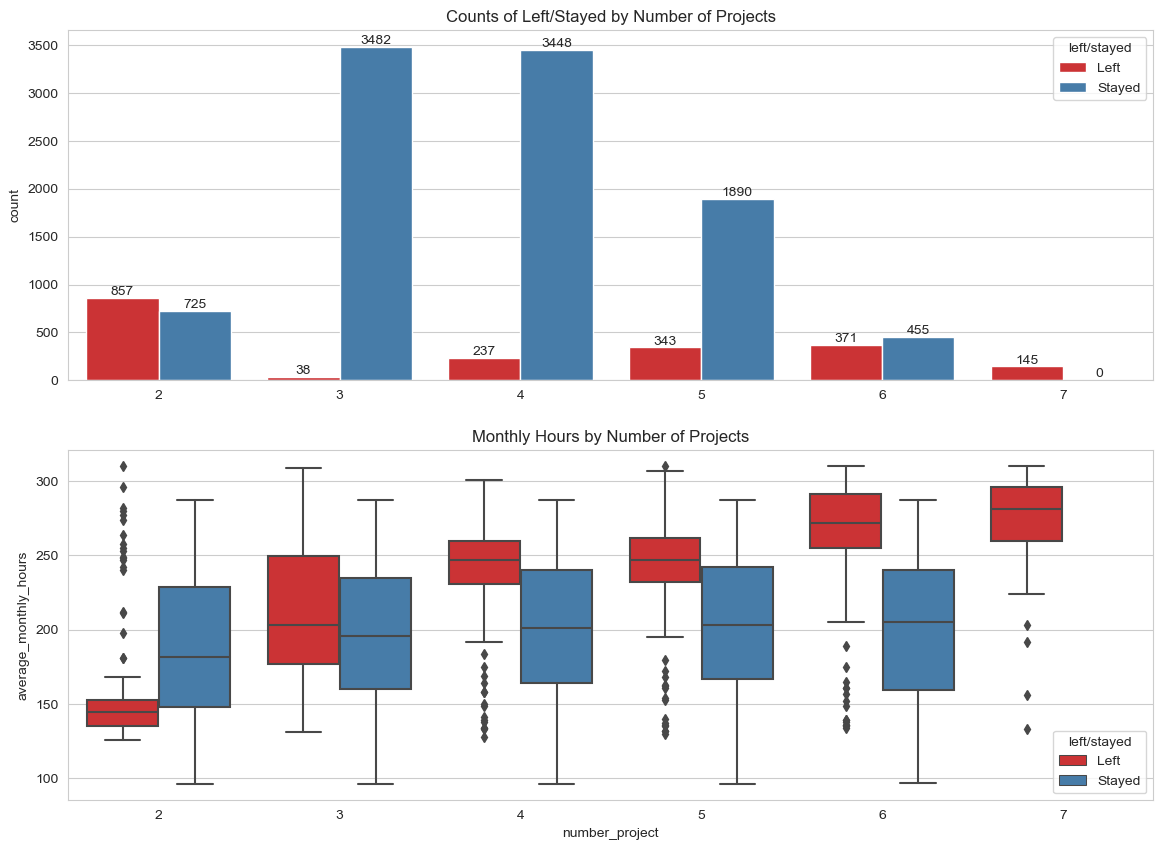

left/stayed        Left  Stayed
number_project                 
2                54.17%  45.83%
3                 1.08%  98.92%
4                 6.43%  93.57%
5                15.36%  84.64%
6                44.92%  55.08%
7               100.00%   0.00%


In [22]:
# Countplot showing count of employees in each 'number_project' by 'left/stayed'
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
q = sns.countplot(hr_data, x='number_project', hue='left/stayed')
q.set_xlabel(xlabel=None)
q.set_title('Counts of Left/Stayed by Number of Projects', fontsize=12)
for value in q.containers:
    q.bar_label(value, fontsize=10)

# Boxplot showing 'average_monthly_hours' distributions for 'number_project', comparing employees who stayed versus those who left
plt.subplot(2, 1, 2)
sns.boxplot(data=hr_data,  x='number_project', y='average_monthly_hours', hue='left/stayed')
plt.title('Monthly Hours by Number of Projects', fontsize=12)
plt.show()

# 'left/stayed' percentage for 'number_projects'
pct=pd.crosstab(index=hr_data['number_project'], columns=hr_data['left/stayed'],
            normalize='index').applymap(lambda x: "{0:.2f}%".format(100*x))
print(pct)

### Note
- Assume 45 work hours per week (Monday to Saturday, 5 hours work on staurdays) and 4 weeks of vacation per year.
- Monthly working hours = (48 weeks * 45 hours per week) / 12 months = <b>180 hours per month</b>.

#### Insights
- Perhaps it makes sense that those who work on more projects would also work longer hours.
- All of the employees (145) who worked with seven projects left the organization, and the interquartile ranges of average monthly hours of this group and those who left with six projects are approximately 255-295 hours, which is substantially more than any other group.
- Most of the employees who had two projects and left the organization worked considerably less hours than their peers. It is possible that these employees have been let go.
- Three to four projects per employee appear to be the sweet spot. For these cohorts, the left/stayed ratio is incredibly low.

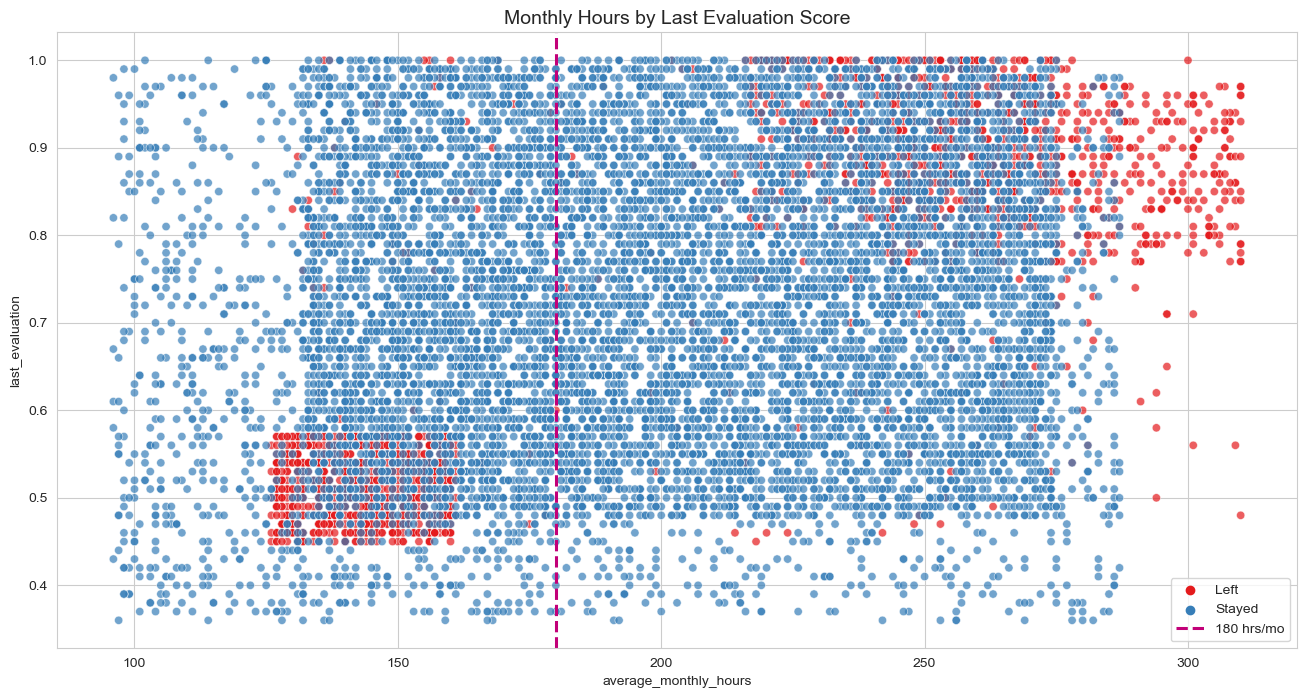

In [23]:
# Scatterplot showing 'average_monthly_hours' versus 'last_evaluation', comparing employees who stayed versus those who left
plt.figure(figsize=(16, 8))
sns.scatterplot(data=hr_data, x='average_monthly_hours', y='last_evaluation',
                hue='left/stayed', alpha=0.7)
plt.axvline(x=180, color='#C20078', label='180 hrs/mo', ls='--', lw=2.2)
plt.legend()
plt.title('Monthly Hours by Last Evaluation Score', fontsize='14')
plt.show()

#### Insights
- Most of the employees in this organization work well over 180 hours per month.
- There are two groups of employees who left the organization: A) Employees who worked significantly longer hours (approximately 260–310 hours per month) and received higher evaluation scores; B) Employees who worked less than the normal monthly working hours (approximately 130–160 hours per month) and received lower evaluation scores.
- Hours worked and evaluation scores appear to be correlated.
- Working long hours doesn’t guarantee a good evaluation score.

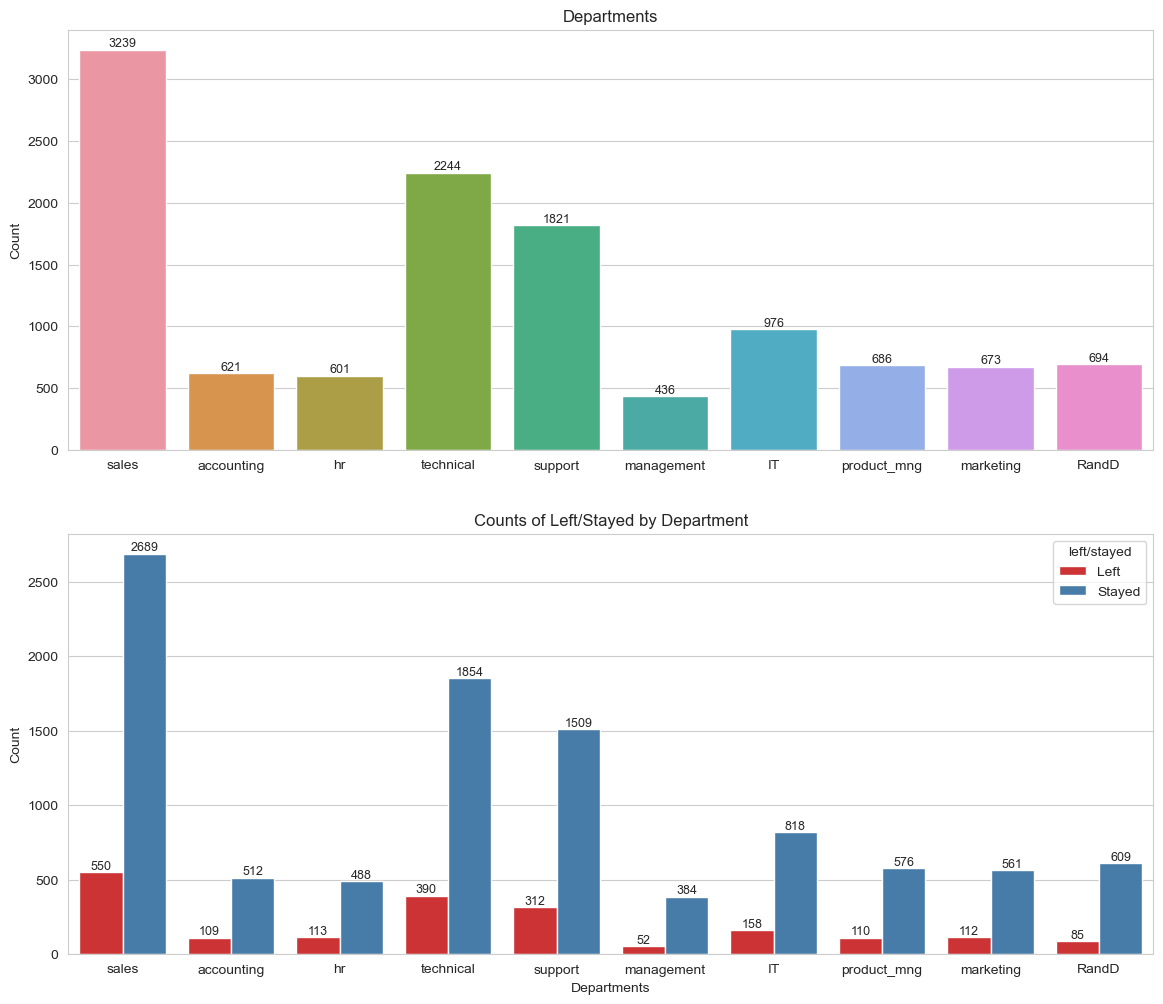

left/stayed    Left  Stayed
department                 
IT           16.19%  83.81%
RandD        12.25%  87.75%
accounting   17.55%  82.45%
hr           18.80%  81.20%
management   11.93%  88.07%
marketing    16.64%  83.36%
product_mng  16.03%  83.97%
sales        16.98%  83.02%
support      17.13%  82.87%
technical    17.38%  82.62%


In [24]:
# Countplot showing number of employees in each 'department'
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
v = sns.countplot(hr_data, x='department')
v.set_xlabel(xlabel=None)
v.set_ylabel('Count')
v.set_title('Departments', fontsize=12)
for value in v.containers:
    v.bar_label(value, fontsize=9)

# Countplot showing number of employees in each 'department' by 'left/stayed'
plt.subplot(2, 1, 2)
q = sns.countplot(hr_data, x='department', hue='left/stayed')
q.set_xlabel('Departments', fontsize=10)
q.set_ylabel('Count')
q.set_title('Counts of Left/Stayed by Department', fontsize=12)
for value in q.containers:
    q.bar_label(value, fontsize=9)
plt.show()

# 'left/stayed' percentage for 'department'
pct=pd.crosstab(index=hr_data['department'], columns=hr_data['left/stayed'],
            normalize='index').applymap(lambda x: "{0:.2f}%".format(100*x))
print(pct)

#### Insights
- In terms of the proportion of employees who left to those who stayed, it doesn't appear that any department differs significantly from the other departments.

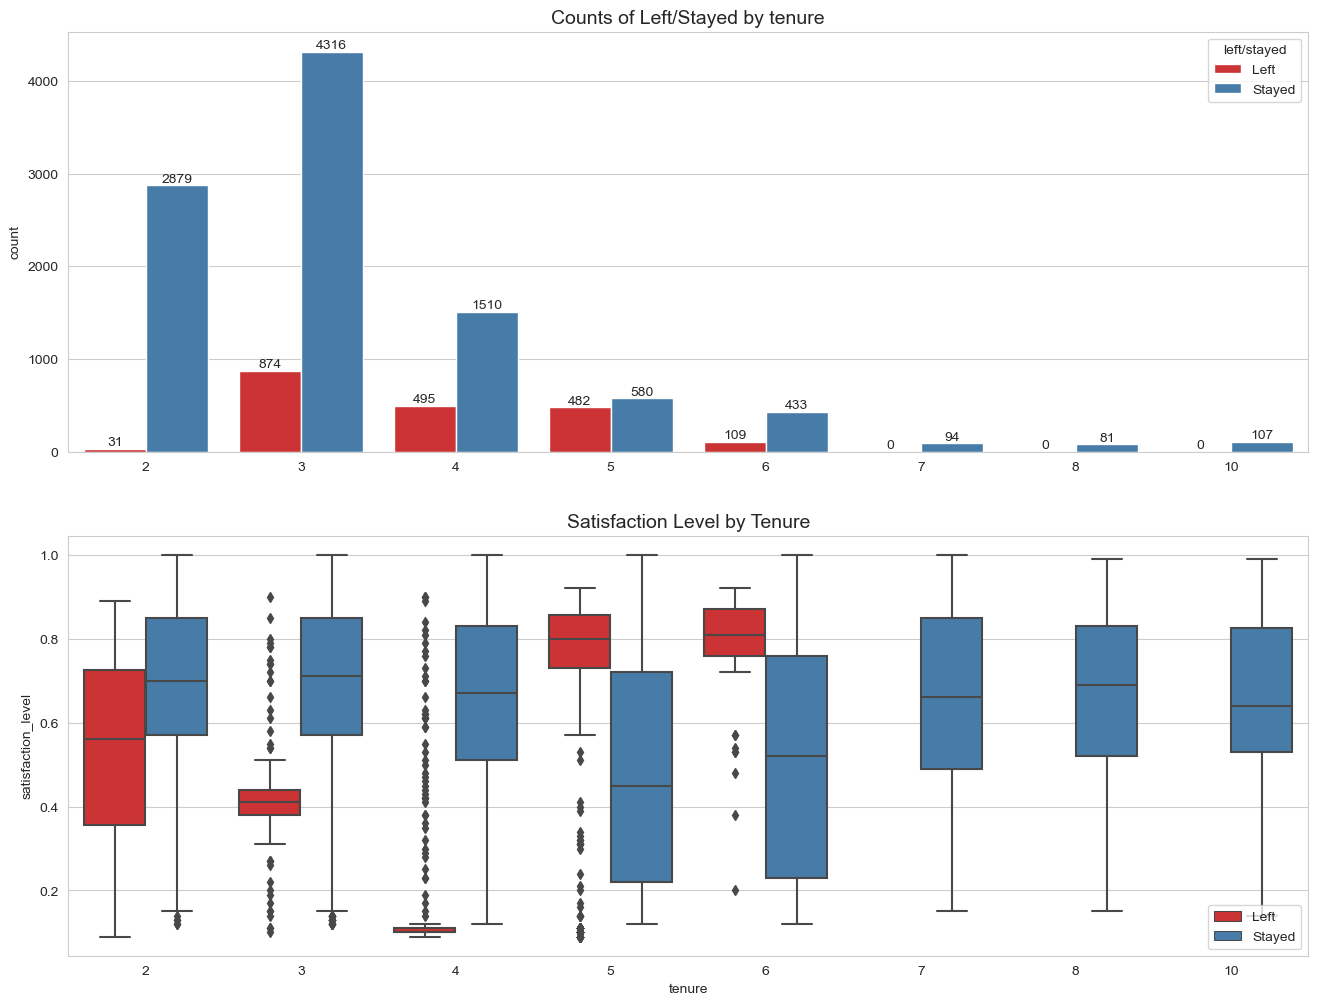

left/stayed    Left   Stayed
tenure                      
2             1.07%   98.93%
3            16.84%   83.16%
4            24.69%   75.31%
5            45.39%   54.61%
6            20.11%   79.89%
7             0.00%  100.00%
8             0.00%  100.00%
10            0.00%  100.00%


In [25]:
#  Countplot showing number of employees for 'tenure' by 'left/stayed'
plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
q = sns.countplot(hr_data, x='tenure', hue='left/stayed')
q.set_xlabel(xlabel=None)
q.set_title('Counts of Left/Stayed by tenure', fontsize=14)
for value in q.containers:
    q.bar_label(value, fontsize=10)

# Boxplot showing 'satisfaction_level' distributions for 'tenure', comparing employees who stayed versus those who left
plt.subplot(2, 1, 2)
sns.boxplot(data=hr_data,  x='tenure', y='satisfaction_level', hue='left/stayed')
plt.legend(loc='lower right')
plt.title('Satisfaction Level by Tenure', fontsize=14)
plt.show()

# 'left/stayed' percentage for 'tenure'
pct=pd.crosstab(index=hr_data['tenure'], columns=hr_data['left/stayed'],
            normalize='index').applymap(lambda x: "{0:.2f}%".format(100*x))
print(pct)

#### Insights
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- The employees with the longest tenure stayed with the organization. They could be the employees who are paid more and hold senior level positions in the organization.
- Four-year employees who left seem to have an unusually low satisfaction level. It’s worth investigating changes to company policy that might have affected employees specifically at the four-year mark, if possible.

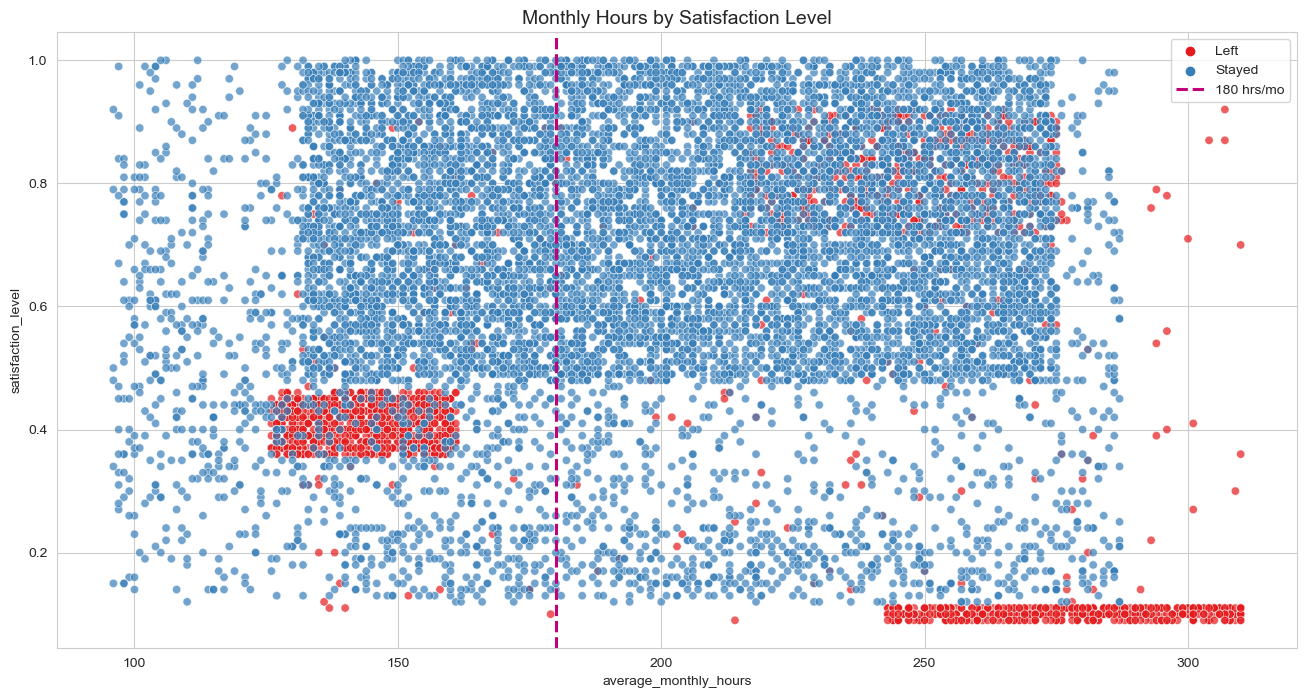

In [26]:
# Scatterplot showing 'average_monthly_hours' versus 'satisfaction_level', comparing employees who stayed versus those who left
plt.figure(figsize=(16, 8))
sns.scatterplot(data=hr_data, x='average_monthly_hours', y='satisfaction_level',
                hue='left/stayed', alpha=0.7)
plt.axvline(x=180, color='#C20078', label='180 hrs/mo', ls='--', lw=2.2)
plt.legend()
plt.title('Monthly Hours by Satisfaction Level', fontsize='14')
plt.show()

#### Insights
- As per the above scatter plot, a sizable group of employees worked approximately between 245 and 310 hours per month, and the satisfaction level of these employees was almost close to zero. These employees worked significantly longer hours compared to normal monthly working hours (180 hrs/mo). It’s likely this is related to their satisfaction levels being close to zero.
- There was another group of employees who worked below the normal monthly working hours, and their satisfaction level was around 0.4. It's difficult to guess why these employees left the organization. It's possible that these employees were pressured to work more considering that so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

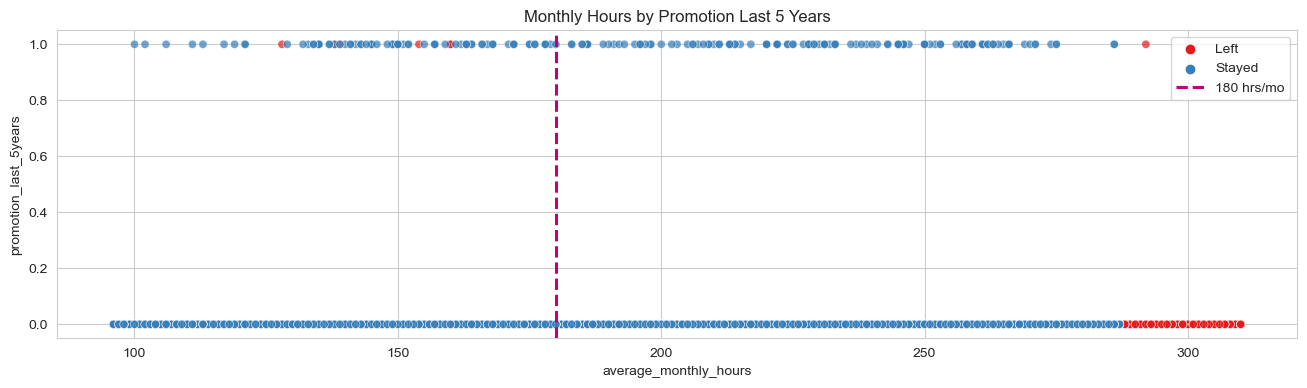

In [27]:
# Scatterplot showing 'average_monthly_hours' versus 'promotion_last_5years', comparing employees who stayed versus those who left
plt.figure(figsize=(16, 4))
sns.scatterplot(hr_data, x='average_monthly_hours', y='promotion_last_5years', 
                hue='left/stayed', alpha=0.7)
plt.axvline(x=180, color='#C20078', label='180 hrs/mo', ls='--', lw=2.2)
plt.legend()
plt.title('Monthly Hours by Promotion Last 5 Years', fontsize=12)
plt.show()

#### Insights
The following observations can be made from the scatterplot above:
- Very few employees who were promoted in the last 5 years left the organization.
- Very few employees who worked the most hours were promoted.
- Most of the employees who left the organization were working the longest hours.

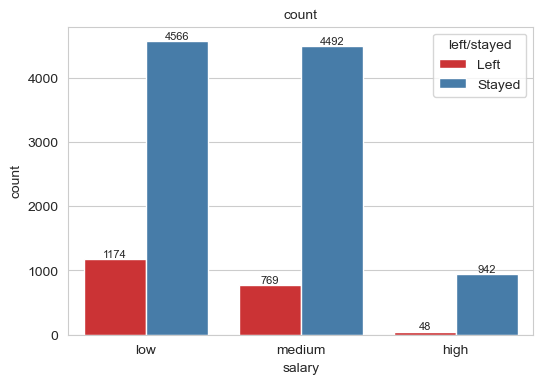

left/stayed    Left  Stayed
salary                     
high          4.85%  95.15%
low          20.45%  79.55%
medium       14.62%  85.38%


In [28]:
# Countplot showing number of employees in each 'salary' level by 'left/stayed'
plt.figure(figsize=(6, 4))
q=sns.countplot(hr_data, x='salary', hue='left/stayed')
q.set_title('count', fontsize=10)
for value in q.containers:
    q.bar_label(value, fontsize=8)
plt.show()

pct=pd.crosstab(index=hr_data['salary'], columns=hr_data['left/stayed'],
            normalize='index').applymap(lambda x: "{0:.2f}%".format(100*x))
print(pct)

#### Insights
- 20.45% of employees with low salary left the organization, followed by 14.62% of those with medium salary and 4.85% of those with high salary.

## 8. Correlation Heatmap

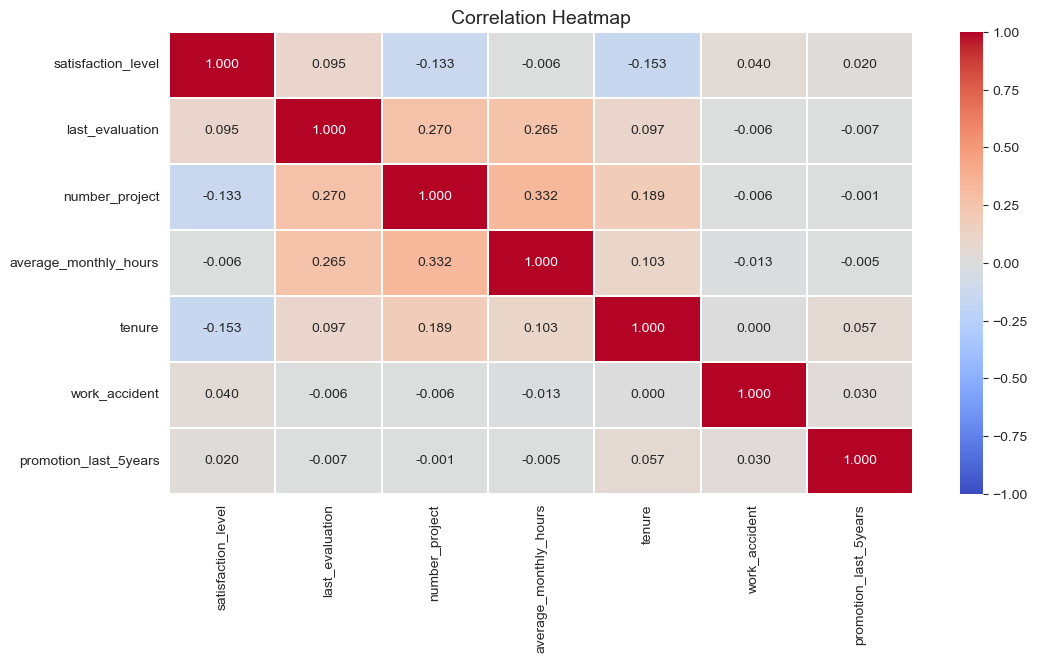

In [29]:
# Create correlation heatmap
plt.figure(figsize=(12, 6))
corr_matrix = hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours',
                       'tenure', 'work_accident', 'promotion_last_5years']].corr()
sns.heatmap(corr_matrix, annot=True, linecolor='white', linewidths=0.05, vmax=1, vmin=-1,
             fmt=".3f", cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

#### Insights
- The correlation heatmap above shows that the <b>number of projects, monthly hours, and evaluation scores</b> all have some positive correlation with each other.

## 9. Label Encoding

In [30]:
# Encode categorical data
le = LabelEncoder()
hr_data['left/stayed']=le.fit_transform(hr_data['left/stayed'])
hr_data['salary']=le.fit_transform(hr_data['salary'])
hr_data['department']=le.fit_transform(hr_data['department'])

## 10. Random Forest Model Building

In [31]:
# Putting feature variable to X
x = hr_data.drop(['left/stayed'], axis=1)

# Putting target variable to y
y = hr_data.loc[:, 'left/stayed']

# Shape of x and y
x.shape, y.shape

((11991, 9), (11991,))

In [32]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,  random_state=42) 

In [33]:
# Display the shape of train and test data
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (8393, 9)
x_test (3598, 9)
y_train (8393,)
y_test (3598,)


In [34]:
# Instantiate model
rfc = RandomForestClassifier(n_estimators = 500, 
                            max_depth = 5,
                            max_features = 2, 
                            random_state = 42)
# Fit the training data
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=500,
                       random_state=42)

In [35]:
# Predicting the test set results
y_pred = rfc.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [36]:
# Display confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 401,  202],
       [  13, 2982]], dtype=int64)

In [37]:
# Display accuracy score
print('Accuracy score:',accuracy_score(y_test, y_pred).round(4))

Accuracy score: 0.9402


In [38]:
# Display f1 score
print('F1 score:',f1_score(y_test, y_pred).round(4))

F1 score: 0.9652


The random forest model provided an accuracy score of 94.02% and an F1 score of 96.52%.

## 11. Random Forest Feature Importances

In [39]:
# Display feature importance scores
rfc.feature_importances_

array([0.35043465, 0.10480243, 0.2206785 , 0.15500427, 0.15176289,
       0.00766747, 0.00071387, 0.00105387, 0.00788204])

In [40]:
# Display feature names
rfc.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'department', 'salary'], dtype=object)

In [41]:
importance_df = pd.DataFrame({'feature': rfc.feature_names_in_, 
                              'importance': rfc.feature_importances_})
importance_df = importance_df.sort_values(by='importance', ascending=False)

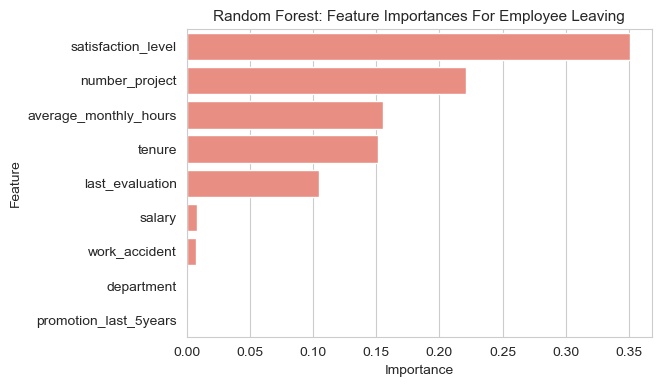

In [42]:
# Visualize feature importance
plt.figure(figsize=(6,4))                        
q = sns.barplot(importance_df, y='feature', x='importance', color='#FA8072')
q.set_xlabel('Importance', fontsize=10)
q.set_ylabel('Feature', fontsize=10)
q.set_title('Random Forest: Feature Importances For Employee Leaving', fontsize=11)
plt.show()

According to the plot above, satisfaction level, number_project, average_monthly_hours, tenure, and  last_evaluation have the highest importance in this random forest model.
The outcome variable (left/stayed) may be most accurately predicted using these variables.

## 12. Conclusion and Recommendations

Employee burn-out is what happens at the end of the overwork chain. There may be short-term wins in the form of completed projects through an overwork culture. But over time it hurts employee job satisfaction and increase company's recruitment and retention costs as burnt-out employees leave and share their experience with other candidates.

The random forest model and the feature importances extracted from the random forest model confirm that employees at <b>Salifort Motors</b> are overworked.

Following are the recommendations that aim to improve employee satisfaction levels and retain employees:
- Introduce a unique and effective reward and recognition program for employees who work on more than five projects.
- Find out what led 54.17% of the employees who worked on two projects to leave the organization. 
- Set a limit on the number of projects each employee can work on.
- Build a healthy and strong workplace feedback culture.
- Consider promoting employees who have been working hard and with the organization for atleast four years, or investigate why four-year tenured employees are so dissatisfied.
- Organize and provide time management training to employees by a professional time management trainer. 
- Create an effective succession planning program.